In [1]:
# Resources
import numpy as np
import pandas as pd

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
# Start Here
life_exp_df = pd.read_csv('Life_Expectancy_Data.csv')
life_exp_df.columns = [col.strip() for col in life_exp_df.columns]
happiness_df = pd.read_csv('Happiness_Consolidated.csv')
happiness_df.columns = [col.strip() for col in happiness_df.columns]

In [4]:
life_exp_df.head()

,ID,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,1,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,2,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,3,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,4,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,5,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [5]:
mean_life_exp = life_exp_df.groupby("Country").mean()
std_life_exp = life_exp_df.groupby("Country").std()

In [6]:
happy_mean_life = happiness_df.groupby("Country").mean()
happy_std_life = happiness_df.groupby("Country").std()

In [9]:
happy_mean_life.loc["Algeria"]["Family"]

1.074205493

In [10]:
mean_life_exp.head()

,ID,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,8.5,2007.5,58.19375,269.0625,78.2500,0.014375,34.960110,64.562500,2362.2500,15.51875,107.5625,48.3750,8.252500,52.3125,0.10000,340.015425,9.972260e+06,16.58125,15.58125,0.415375,8.21250
Albania,24.5,2007.5,75.15625,45.0625,0.6875,4.848750,193.259091,98.000000,53.3750,49.06875,0.9375,98.1250,5.945625,98.0625,0.10000,2119.726679,6.969116e+05,1.61875,1.70000,0.709875,12.13750
Algeria,40.5,2007.5,73.61875,108.1875,20.3125,0.406667,236.185241,78.000000,1943.8750,48.74375,23.5000,91.7500,4.604000,91.8750,0.10000,2847.853392,2.164983e+07,6.09375,5.97500,0.694875,12.71250
Angola,56.5,2007.5,49.01875,328.5625,83.7500,5.740667,102.100268,70.222222,3561.3125,18.01875,132.6250,46.1250,3.919333,47.6875,2.36875,1975.143045,1.014710e+07,6.19375,6.66875,0.458375,8.04375
Antigua and Barbuda,72.5,2007.5,75.05625,127.5000,0.0000,7.949333,1001.585226,98.266667,0.0000,38.42500,0.0000,96.9375,4.791333,98.3125,0.12500,9759.305728,NaN,3.42500,3.37500,0.488625,8.84375


In [11]:
from scipy.stats import norm
def random_values_life_exp(country, input_column, samples=100):
    mean = mean_life_exp.loc[country][input_column]
    std = std_life_exp.loc[country, input_column]
    return pd.DataFrame({"country": [country], input_column: [norm.rvs(size=samples, loc=mean, scale=std)]}).explode(input_column)

def empty_values(country, input_column, samples=100):
    nan_list = [np.nan for i in range(samples)]
    return pd.DataFrame({"country": [country], input_column: [nan_list]}).explode(input_column)

In [12]:
from functools import reduce
help(reduce)

Help on built-in function reduce in module _functools:

reduce(...)
    reduce(function, sequence[, initial]) -> value
    
    Apply a function of two arguments cumulatively to the items of a sequence,
    from left to right, so as to reduce the sequence to a single value.
    For example, reduce(lambda x, y: x+y, [1, 2, 3, 4, 5]) calculates
    ((((1+2)+3)+4)+5).  If initial is present, it is placed before the items
    of the sequence in the calculation, and serves as a default when the
    sequence is empty.



In [13]:
mean_life_exp.columns

Index(['ID', 'Year', 'Life expectancy', 'Adult Mortality', 'infant deaths',
       'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles', 'BMI',
       'under-five deaths', 'Polio', 'Total expenditure', 'Diphtheria',
       'HIV/AIDS', 'GDP', 'Population', 'thinness  1-19 years',
       'thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')

In [14]:
# if you don't want country_x, country_y columns
# don't drop the index when doing eset_index in next cell
join_df_func = lambda df1, df2: pd.merge(df1, df2, on=["index", "country"], how="inner")

In [15]:
countries = mean_life_exp.index
input_cols = ['Life expectancy', 'Adult Mortality', 'infant deaths',
       'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles', 'BMI',
       'under-five deaths', 'Polio', 'Total expenditure', 'Diphtheria',
       'HIV/AIDS', 'GDP', 'Population', 'thinness  1-19 years',
       'thinness 5-9 years', 'Income composition of resources', 'Schooling']
all_col_dfs = []
for input_col in input_cols:
    life_exp_dfs = []
    for country in countries:
    
        try:
            life_exp_dfs.append(random_values_life_exp(country, input_col, samples=100))
        except:
            # needed so rows match by index
            empty_df = empty_values(country, input_col, samples=100)
            life_exp_dfs.append(empty_df)
    if len(life_exp_dfs):
        # setting drop = False makes a new column called index that we can join on
        # kind of dumb but drop the old index and create a new one that is 0, 1, 2, ...
        # then drop it again but keep it as a column too
        df = pd.concat(life_exp_dfs).reset_index(drop=True).reset_index(drop=False)
        all_col_dfs.append(df)
life_exp_montecarlo_exp_hep = reduce(join_df_func, all_col_dfs)
life_exp_montecarlo_exp_hep.head()

,index,country,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,0,Afghanistan,60.9579,222.197,65.6562,0.0295425,38.8052,63.9143,1705.69,15.1481,97.7074,54.2675,8.05774,69.1358,0.1,-119.675,4.16291e+06,17.3532,19.2795,0.469885,8.6117
1,1,Afghanistan,58.1333,250.706,85.6927,0.00175421,33.3491,64.9157,1585.43,13.7697,95.3927,50.2977,8.23044,68.0966,0.1,252.797,1.80438e+07,18.9138,22.6481,0.434203,7.98716
2,2,Afghanistan,59.7947,395.71,72.4385,0.0221973,47.7048,65.1482,4239.85,14.0129,117.658,35.1463,8.33829,42.3568,0.1,227.661,-3.19818e+06,15.5925,24.2366,0.402838,7.96174
3,3,Afghanistan,59.686,305.384,89.5631,0.0139292,67.1452,62.9682,3936.46,14.9383,100.928,50.1872,8.0177,51.6354,0.1,318.945,4.49875e+06,2.10524,25.8494,0.385817,13.8149
4,4,Afghanistan,60.0202,222.349,80.104,0.00467522,44.2144,63.7544,1933.44,15.1342,104.098,56.416,8.21097,61.726,0.1,506.376,1.02458e+07,6.06718,10.6099,0.34073,10.1905


In [16]:
len(life_exp_montecarlo_exp_hep)

19300

In [17]:
life_exp_montecarlo_exp_hep = life_exp_montecarlo_exp_hep.dropna()
life_exp_montecarlo_exp_hep.head()

,index,country,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,0,Afghanistan,60.9579,222.197,65.6562,0.0295425,38.8052,63.9143,1705.69,15.1481,97.7074,54.2675,8.05774,69.1358,0.1,-119.675,4.16291e+06,17.3532,19.2795,0.469885,8.6117
1,1,Afghanistan,58.1333,250.706,85.6927,0.00175421,33.3491,64.9157,1585.43,13.7697,95.3927,50.2977,8.23044,68.0966,0.1,252.797,1.80438e+07,18.9138,22.6481,0.434203,7.98716
2,2,Afghanistan,59.7947,395.71,72.4385,0.0221973,47.7048,65.1482,4239.85,14.0129,117.658,35.1463,8.33829,42.3568,0.1,227.661,-3.19818e+06,15.5925,24.2366,0.402838,7.96174
3,3,Afghanistan,59.686,305.384,89.5631,0.0139292,67.1452,62.9682,3936.46,14.9383,100.928,50.1872,8.0177,51.6354,0.1,318.945,4.49875e+06,2.10524,25.8494,0.385817,13.8149
4,4,Afghanistan,60.0202,222.349,80.104,0.00467522,44.2144,63.7544,1933.44,15.1342,104.098,56.416,8.21097,61.726,0.1,506.376,1.02458e+07,6.06718,10.6099,0.34073,10.1905


In [24]:
# Happines data
def random_happiness(country, input_column, samples=100):
    mean = happy_mean_life.loc[country][input_column]
    std = happy_std_life.loc[country, input_column]
    return pd.DataFrame({"country": [country], input_column: [norm.rvs(size=samples, loc=mean, scale=std)]}).explode(input_column)

def happiness_empty_values(country, input_column, samples=100):
    nan_list = [np.nan for i in range(samples)]
    return pd.DataFrame({"country": [country], input_column: [nan_list]}).explode(input_column)

In [25]:
join_df_func_2 = lambda df3, df4: pd.merge(df3, df4, on=["index", "country"], how="inner")

In [26]:
happy_mean_life.columns

Index(['ID', 'Happiness Rank', 'Happiness Score', 'Lower Confidence Interval',
       'Upper Confidence Interval', 'Standard Error',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual', 'Year'],
      dtype='object')

In [27]:
countries_2 = happy_mean_life.index
input_cols_2 = ['Happiness Rank', 'Happiness Score', 'Lower Confidence Interval',
       'Upper Confidence Interval',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual']
all_col_dfs_2 = []
for input_col_2 in input_cols_2:
    happy_dfs = []
    for country in countries:
    
        try:
            happy_dfs.append(random_happiness(country, input_col_2, samples=100))
        except:
            # needed so rows match by index
            empty_df_2 = happiness_empty_values(country, input_col_2, samples=100)
            happy_dfs.append(empty_df_2)
    if len(happy_dfs):
        # setting drop = False makes a new column called index that we can join on
        # kind of dumb but drop the old index and create a new one that is 0, 1, 2, ...
        # then drop it again but keep it as a column too
        df_2 = pd.concat(happy_dfs).reset_index(drop=True).reset_index(drop=False)
        all_col_dfs_2.append(df_2)
happiness_mean = reduce(join_df_func_2, all_col_dfs_2)
happiness_mean.head()

,index,country,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,0,Afghanistan,150.35,3.18806,2.99011,3.51057,0.316318,0.608306,0.207684,0.25556,0.0900249,0.306394,2.14142
1,1,Afghanistan,158.38,3.28439,3.79854,4.10341,0.359943,0.399285,0.244042,0.194097,0.0364361,0.22542,1.96292
2,2,Afghanistan,151.224,3.58615,3.54245,3.64029,0.415834,0.466445,0.199857,0.122549,0.0658761,0.19351,2.16326
3,3,Afghanistan,149.335,3.71805,3.32251,3.82027,0.367131,-0.122056,0.232272,0.170226,0.0313295,0.161632,1.96412
4,4,Afghanistan,142.822,3.47197,2.90098,4.06839,0.386626,0.726783,0.333926,0.111552,0.0441022,0.226557,2.20023


In [28]:
len(happiness_mean)

19300

In [29]:
happiness_mean = happiness_mean.dropna()
happiness_mean.head()

,index,country,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,0,Afghanistan,150.35,3.18806,2.99011,3.51057,0.316318,0.608306,0.207684,0.25556,0.0900249,0.306394,2.14142
1,1,Afghanistan,158.38,3.28439,3.79854,4.10341,0.359943,0.399285,0.244042,0.194097,0.0364361,0.22542,1.96292
2,2,Afghanistan,151.224,3.58615,3.54245,3.64029,0.415834,0.466445,0.199857,0.122549,0.0658761,0.19351,2.16326
3,3,Afghanistan,149.335,3.71805,3.32251,3.82027,0.367131,-0.122056,0.232272,0.170226,0.0313295,0.161632,1.96412
4,4,Afghanistan,142.822,3.47197,2.90098,4.06839,0.386626,0.726783,0.333926,0.111552,0.0441022,0.226557,2.20023


In [30]:
#merge = (life_exp_montecarlo_exp_hep, happiness_df)
#new_merge_df = pd.concat(merge)
#new_merge_df.head()
new_merge_df = pd.merge(life_exp_montecarlo_exp_hep, happiness_mean, on=["index", "country"], how="inner")
new_merge_df.head()

,index,country,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,0,Afghanistan,60.9579,222.197,65.6562,0.0295425,38.8052,63.9143,1705.69,15.1481,97.7074,54.2675,8.05774,69.1358,0.1,-119.675,4.16291e+06,17.3532,19.2795,0.469885,8.6117,150.35,3.18806,2.99011,3.51057,0.316318,0.608306,0.207684,0.25556,0.0900249,0.306394,2.14142
1,1,Afghanistan,58.1333,250.706,85.6927,0.00175421,33.3491,64.9157,1585.43,13.7697,95.3927,50.2977,8.23044,68.0966,0.1,252.797,1.80438e+07,18.9138,22.6481,0.434203,7.98716,158.38,3.28439,3.79854,4.10341,0.359943,0.399285,0.244042,0.194097,0.0364361,0.22542,1.96292
2,2,Afghanistan,59.7947,395.71,72.4385,0.0221973,47.7048,65.1482,4239.85,14.0129,117.658,35.1463,8.33829,42.3568,0.1,227.661,-3.19818e+06,15.5925,24.2366,0.402838,7.96174,151.224,3.58615,3.54245,3.64029,0.415834,0.466445,0.199857,0.122549,0.0658761,0.19351,2.16326
3,3,Afghanistan,59.686,305.384,89.5631,0.0139292,67.1452,62.9682,3936.46,14.9383,100.928,50.1872,8.0177,51.6354,0.1,318.945,4.49875e+06,2.10524,25.8494,0.385817,13.8149,149.335,3.71805,3.32251,3.82027,0.367131,-0.122056,0.232272,0.170226,0.0313295,0.161632,1.96412
4,4,Afghanistan,60.0202,222.349,80.104,0.00467522,44.2144,63.7544,1933.44,15.1342,104.098,56.416,8.21097,61.726,0.1,506.376,1.02458e+07,6.06718,10.6099,0.34073,10.1905,142.822,3.47197,2.90098,4.06839,0.386626,0.726783,0.333926,0.111552,0.0441022,0.226557,2.20023


In [31]:
len(new_merge_df)

10800

In [32]:
new_merge_df.columns

Index(['index', 'country', 'Life expectancy', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles', 'BMI', 'under-five deaths', 'Polio', 'Total expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness  1-19 years',
       'thinness 5-9 years', 'Income composition of resources', 'Schooling',
       'Happiness Rank', 'Happiness Score', 'Lower Confidence Interval',
       'Upper Confidence Interval', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

In [36]:
# Split data into training and testing
X = new_merge_df[['Life expectancy', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles', 'BMI', 'under-five deaths', 'Polio', 'Total expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness  1-19 years',
       'thinness 5-9 years', 'Income composition of resources', 'Schooling',
       'Happiness Rank','Lower Confidence Interval',
       'Upper Confidence Interval', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual']]

y = new_merge_df['Happiness Score']

In [57]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=100)

In [42]:
model = LinearRegression()

In [43]:
model.fit(X_train, y_train)

LinearRegression()

In [45]:
y_predict = model.predict(X_test)
print(y_predict)

[3.12519257 6.51332953 5.98270216 ... 4.97361169 3.86269328 5.26489714]


Feature: 0, Score: 0.00287
Feature: 1, Score: -0.00004
Feature: 2, Score: -0.00010
Feature: 3, Score: 0.00375
Feature: 4, Score: 0.00001
Feature: 5, Score: -0.00045
Feature: 6, Score: -0.00000
Feature: 7, Score: -0.00027
Feature: 8, Score: 0.00010
Feature: 9, Score: -0.00030
Feature: 10, Score: 0.00241
Feature: 11, Score: -0.00030
Feature: 12, Score: -0.00287
Feature: 13, Score: 0.00000
Feature: 14, Score: -0.00000
Feature: 15, Score: -0.00383
Feature: 16, Score: -0.00378
Feature: 17, Score: -0.03398
Feature: 18, Score: -0.00357
Feature: 19, Score: -0.00502
Feature: 20, Score: 0.34137
Feature: 21, Score: 0.31481
Feature: 22, Score: 0.09336
Feature: 23, Score: 0.05502
Feature: 24, Score: -0.01595
Feature: 25, Score: 0.28764
Feature: 26, Score: -0.10880
Feature: 27, Score: 0.10093
Feature: 28, Score: 0.05291


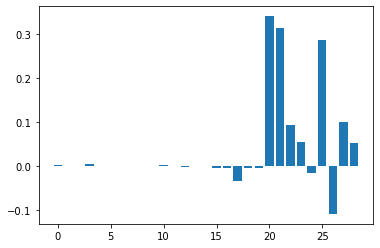

In [58]:
# Feature importance
# fit the model
model.fit(X_train, y_train)
# get importance
importance = model.coef_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()